# **Importing Necessary Libraries**

---



In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
df = pd.read_csv("/content/drive/MyDrive/words.csv")

In [111]:
df.head()

,Words
0,which
1,there
2,their
3,about
4,would


In [112]:
df = df.sort_values(by=['Words'])

In [113]:
df.head()

,Words
402,FALSE
4945,aargh
4616,abaca
3748,abaci
2475,aback


In [114]:
df.shape

(5757, 1)

# **Feature Engineering**

---



In [115]:
df["Words"] = df["Words"].apply(lambda x: x.upper())

In [116]:
df.head()

,Words
402,FALSE
4945,AARGH
4616,ABACA
3748,ABACI
2475,ABACK


In [117]:
df = df.sort_values(by=['Words'])
df.head()

,Words
4945,AARGH
4616,ABACA
3748,ABACI
2475,ABACK
5644,ABAFT


In [118]:
df.reset_index(drop=True, inplace=True)

In [119]:
df.head()

,Words
0,AARGH
1,ABACA
2,ABACI
3,ABACK
4,ABAFT


In [120]:
df["L1"] = df["Words"].apply(lambda x: x[0])
df["L2"] = df["Words"].apply(lambda x: x[1])
df["L3"] = df["Words"].apply(lambda x: x[2])
df["L4"] = df["Words"].apply(lambda x: x[3])
df["L5"] = df["Words"].apply(lambda x: x[4])

In [121]:
df.head()

,Words,L1,L2,L3,L4,L5
0,AARGH,A,A,R,G,H
1,ABACA,A,B,A,C,A
2,ABACI,A,B,A,C,I
3,ABACK,A,B,A,C,K
4,ABAFT,A,B,A,F,T


# **Visualizations**

---



<Axes: xlabel='L1', ylabel='count'>

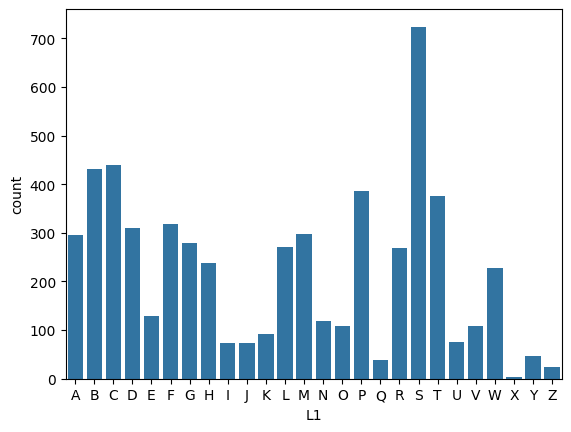

In [14]:
sns.countplot(x = "L1", data=df)

<Axes: xlabel='L2', ylabel='count'>

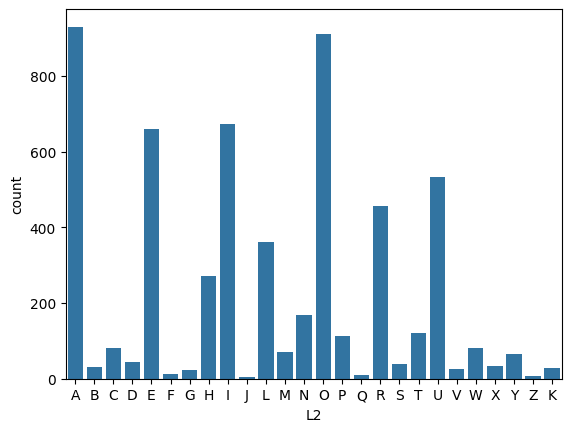

In [15]:
sns.countplot(x = "L2", data=df)

<Axes: xlabel='L3', ylabel='count'>

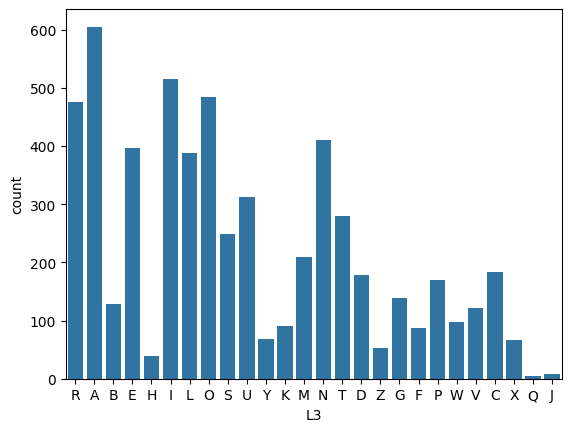

In [16]:
sns.countplot(x = "L3", data=df)

<Axes: xlabel='L4', ylabel='count'>

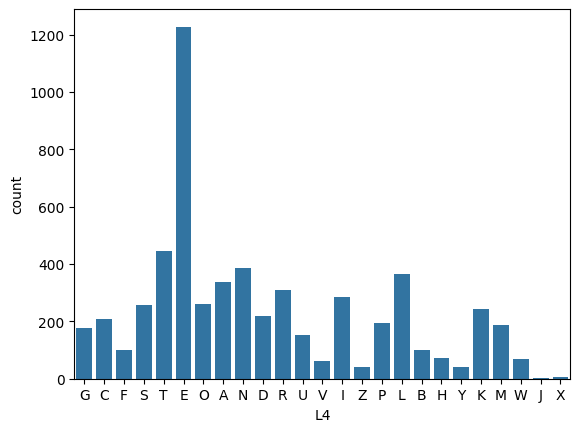

In [17]:
sns.countplot(x = "L4", data=df)

<Axes: xlabel='L5', ylabel='count'>

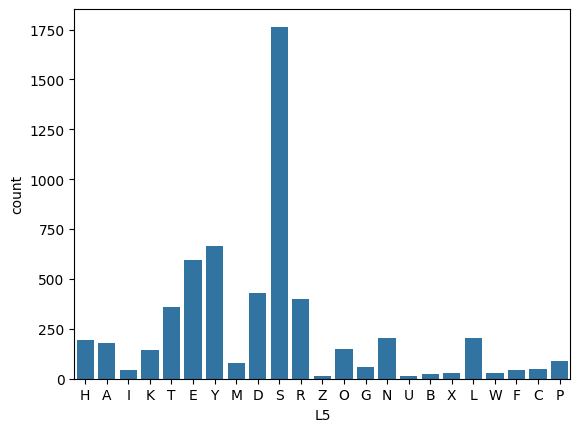

In [18]:
sns.countplot(x = "L5", data=df)

In [126]:
df.to_csv("finalwords.csv", index = False)

# **Initialization**

---



In [85]:
import numpy as np
import pandas as pd
use_df = pd.read_csv("/content/drive/MyDrive/finalwords.csv")

In [128]:
def remove_cases(l, p = None, df = use_df):

  l = l.upper()

  if p != None:

    idx = ["L1", "L2", "L3", "L4","L5"]
    i = idx[p-1]
    df = df[df[i] != l]

  else:

    df = df[df["L1"] != l]
    df = df[df["L2"] != l]
    df = df[df["L3"] != l]
    df = df[df["L4"] != l]
    df = df[df["L5"] != l]

  df = df.reset_index(drop=True)
  return df

def find_cases(l, df = use_df, p=None):

  l = l.upper()

  if(p != None):

    idx = ["L1", "L2", "L3", "L4","L5"]
    i = idx[p-1]

    df = df[df[i] == l]

  else:

    idx = list()
    for i in df["Words"]:

      if(l in i):

        val = np.where(df["Words"] == i)[0][0]
        idx.append(val)

    df = df.iloc[idx]

  df = df.reset_index(drop=True)
  return df


# **Main Section**

---



## **Remove All Cases of a Letter**

---



In [ ]:
l = 'l'
use_df = remove_cases(l, df = use_df)
use_df

## **Remove Cases of a Letter with Positions**

---



In [ ]:
l = 'e'
p = 3
use_df = remove_cases(l, p, df = use_df)
use_df

## **Find All Cases of a Letter**

---



In [ ]:
l = 'e'
use_df = find_cases(l, df = use_df)
use_df

## **Find Cases of a Letter with Position**

---



In [ ]:
l   = 'l'
p = 2
use_df = find_cases(l, df = use_df, pos = p)
use_df

# **App Code**

---



In [ ]:
#Import Necessary Libraries
import numpy as np
import pandas as pd
import streamlit as st

# Initialization Function
def init():

    if "init" not in st.session_state:

        url = "https://drive.google.com/file/d/16NdRk9DcEb_wTsRkZ3WfORNYG2J18PZ2/view?usp=sharing"
        url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]

        use_df = pd.read_csv(url)
        use_df = use_df[["L1", "L2", "L3", "L4", "L5", "Words"]]

        st.session_state.init = use_df

        st.dataframe(st.session_state.init, height = 500, width = 1200, hide_index=True)
        s = use_df.shape
        st.write( "Number of Words: " + str(s[0]))

        return use_df


    use_df = st.session_state.init
    return use_df

# Showing DataFrame in each Iteration
def show_df():

        st.dataframe(st.session_state.init, height = 500, width = 1200, hide_index=True)
        s = use_df.shape
        st.write( "Number of Words: " + str(s[0]))

# Remove Cases of Letters with/without Function
def remove_cases(l, df, p = None):

    l = l.upper()

    if p != None:

        idx = ["L1", "L2", "L3", "L4","L5"]
        i = idx[p-1]
        df = df[df[i] != l]

    else:

        df = df[df["L1"] != l]
        df = df[df["L2"] != l]
        df = df[df["L3"] != l]
        df = df[df["L4"] != l]
        df = df[df["L5"] != l]

    df = df.reset_index(drop=True)
    st.session_state.init = df
    return df

# Find All Cases of a Letter
def find_cases(l, df, p = None):

    l = l.upper()
    if(p != None):

        idx = ["L1", "L2", "L3", "L4","L5"]
        i = idx[p-1]

        df = df[df[i] == l]

    else:

      idx = list()
      for i in df["Words"]:

        if(l in i):

            val = np.where(df["Words"] == i)[0][0]
            idx.append(val)

      df = df.iloc[idx]

    df = df.reset_index(drop=True)
    st.session_state.init = df
    return df


# Main App Code

st.title("Wordle Game Helper")
st.divider()

use_df = init()

#########################################################################

st.sidebar.title("Options")

#########################################################################

o1_form = st.sidebar.form("Removing Cases of a Letter")
o1_form.header("Removing Cases of a Letter")
l = o1_form.text_input(" Enter Choice of Letter", max_chars=1)
o1_submit = o1_form.form_submit_button()

if o1_submit:

        st.empty()
        st.write("Removing Letter: " + l.upper())
        use_df = remove_cases(l, use_df)

        show_df()

#######################################################################

o2_form = st.sidebar.form("Removing Cases of a Letter with Position")
o2_form.header("Removing Cases of a Letter with Position")
l = o2_form.text_input(" Enter Choice of Letter", max_chars=1)
p = o2_form.number_input("Enter Position of Letter", min_value = 1, max_value = 5)
o2_submit = o2_form.form_submit_button()

if o2_submit:

        st.empty()
        st.write("Removing Letter: " + l.upper() + " At Position: " + str(p))
        use_df = remove_cases(l, use_df, p)

        show_df()

#######################################################################

o3_form = st.sidebar.form("Finding All Cases of a Letter")
o3_form.header("Finding All Cases of a Letter")
l = o3_form.text_input(" Enter Choice of Letter", max_chars=1)
o3_submit = o3_form.form_submit_button()

if o3_submit:

        st.empty()
        st.write("Cases of Letter: " + l.upper())
        use_df = find_cases(l, use_df)

        show_df()

#######################################################################

o4_form = st.sidebar.form("Finding Cases of a Letter with Position")
o4_form.header("Finding Cases of a Letter with Position")
l = o4_form.text_input(" Enter Choice of Letter", max_chars=1)
p = o4_form.number_input("Enter Position of Letter", min_value = 1, max_value = 5)
o4_submit = o4_form.form_submit_button()

if o4_submit:

        st.empty()
        st.write("Cases of Letter: " + l.upper() + " with Position: " + str(p))
        use_df = find_cases(l, use_df, p)

        show_df()

#######################################################################


# **Support Links**

---
1. https://github.com/jack-cook-repo/wordle-solver/blob/main/Wordle%20solver%20-%20exploration.ipynb

2. https://www.kaggle.com/datasets/cprosser3/wordle-5-letter-words/code

3. https://github.com/charlesreid1/five-letter-words/blob/master/sgb-words.txt
